In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pikachusamples/videedao.mp4
/kaggle/input/pikachusamples/maxresdefault.jpg
/kaggle/input/pikachusamples/video.mp4
/kaggle/input/pikachusamples/Pikachu Moments .mp4
/kaggle/input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4
/kaggle/input/yolov3custompikachu/yolov3-spp-ultralytics.pt
/kaggle/input/yolov3custompikachu/images/170.jpg
/kaggle/input/yolov3custompikachu/images/045.jpg
/kaggle/input/yolov3custompikachu/images/438.jpg
/kaggle/input/yolov3custompikachu/images/234.jpg
/kaggle/input/yolov3custompikachu/images/458.jpg
/kaggle/input/yolov3custompikachu/images/287.jpg
/kaggle/input/yolov3custompikachu/images/404.jpg
/kaggle/input/yolov3custompikachu/images/167.jpg
/kaggle/input/yolov3custompikachu/images/058.jpg
/kaggle/input/yolov3custompikachu/images/138.jpg
/kaggle/input/yolov3custompikachu/images/257.jpg
/kaggle/input/yolov3custompikachu/images/163.jpg
/kaggle/input/yolov3custompikachu/images/148.jpg
/kaggle/input/yolov3custompikachu/images/238.jpg


Clone this repo for using the pre trained model

In [5]:
!git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (7/7), done.


Remove already present data that you don't need

In [6]:
rm YoloV3/data/customdata/images/* YoloV3/data/customdata/labels/*

Add the images and annotated labels

In [7]:
cp ../input/yolov3custompikachu/images/* YoloV3/data/customdata/images

In [8]:
cp ../input/yolov3custompikachu/labels/* YoloV3/data/customdata/labels

Create a weight directoy and add the yolo torch weight file there(yolo3-spp-ultralytics.pt)

In [9]:
mkdir YoloV3/weights

* Add custom.txt -> Annotated labels path 
* custom.names -> Name of classes (pikachu)
* custom.shapes -> Check Preprocessing Notebook
* custom.data -> Check Readme.md
* All these files are already available in my Kaggle dataset

In [10]:
cp ../input/customfiles/custom* YoloV3/data/customdata/

In [11]:
ls YoloV3/data/customdata/

custom.data  custom.names  custom.shapes  custom.txt  images/  labels/


In [12]:
cd YoloV3

/kaggle/working/YoloV3


Check whether cuda is working or not

In [13]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


Checking whether everything is working or not on previous cfg

In [14]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 10 --nosave

Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=10, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-07-15 13:43:27.337773: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2738      0 --:--:-- --:--:-- --:--:--  2738
  0     0    0     0    0     0    

Time to train your data. We have around 481 images. My laziness allowed me to train this for only 300 epochs on such a small data. Not training the data again while commiting this notebook. So, the next cell is in markdown.

In [15]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-07-15 14:00:54.438452: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (468 found, 5 missing, 8 empty, 0 duplicate, for 481 images): 100
Caching images (0.3GB): 100%|████████████████| 481/481 [00:02<00:00, 195.98it/s]
Caching labels (468 found, 5 missing, 8 empty, 0 duplicate, for 481 images): 100
Caching images (0.1GB): 

    45/299       14G      2.31      1.14         0      3.45         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.753     0.733     0.686     0.743

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    46/299       14G      1.95      1.13         0      3.08         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.814     0.696     0.723      0.75

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    47/299       14G      2.17      1.13         0       3.3         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.792     0.728      0.74     0.759

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    48/299       14G     

    95/299       14G      1.52     0.936         0      2.46         4       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559      0.86     0.791     0.804     0.824

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    96/299       14G       1.4     0.904         0       2.3         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.881     0.795     0.831     0.836

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    97/299       14G      1.63     0.954         0      2.59         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.862     0.819     0.808      0.84

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    98/299       14G     

   145/299       14G      1.28     0.799         0      2.08         3       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.892      0.83     0.861      0.86

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   146/299       14G      1.14     0.741         0      1.88         1       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.902     0.821     0.868      0.86

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   147/299       14G      1.24     0.766         0         2         4       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.918     0.758     0.855     0.831

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   148/299       14G     

   195/299       14G     0.879      0.65         0      1.53         3       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.926      0.81     0.895     0.864

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   196/299       14G      1.03     0.594         0      1.62         1       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.916     0.816     0.896     0.863

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   197/299       14G      1.08     0.641         0      1.72         3       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.926     0.784     0.878     0.849

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   198/299       14G     

   245/299       14G     0.688     0.531         0      1.22         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.964     0.741     0.882     0.838

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   246/299       14G     0.938     0.558         0       1.5         5       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.964     0.764     0.884     0.853

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   247/299       14G     0.737     0.522         0      1.26         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559      0.96     0.769     0.886     0.854

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   248/299       14G     

   295/299       14G     0.667     0.479         0      1.15         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.959     0.754      0.88     0.844

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   296/299       14G     0.662     0.501         0      1.16         5       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559     0.957     0.748     0.873      0.84

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   297/299       14G     0.691      0.47         0      1.16         2       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       481       559      0.96     0.744     0.875     0.838

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   298/299       14G     

In [16]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/481 data/customdata/images/001.jpg: 384x512 4 pikachus, Done. (0.017s)
image 2/481 data/customdata/images/002.jpg: 512x320 2 pikachus, Done. (0.017s)
image 3/481 data/customdata/images/003.jpg: 512x512 1 pikachus, Done. (0.020s)
image 4/481 data/customdata/images/004.jpg: 320x512 1 pikachus, Done. (0.016s)
image 5/481 data/customdata/images/005.jpg: 512x384 Done. (0.018s)
image 6/481 data/customdata/images/006.jpg: 320x512 1 pikachus, Done. (0.016s)
image 7/481 data/customdata/images/007.jpg: 448x512 2

image 99/481 data/customdata/images/099.jpg: 384x512 1 pikachus, Done. (0.016s)
image 100/481 data/customdata/images/100.jpg: 256x512 1 pikachus, Done. (0.013s)
image 101/481 data/customdata/images/101.jpg: 512x448 1 pikachus, Done. (0.018s)
image 102/481 data/customdata/images/102.jpg: 320x512 1 pikachus, Done. (0.015s)
image 103/481 data/customdata/images/103.jpg: 512x448 1 pikachus, Done. (0.018s)
image 104/481 data/customdata/images/104.jpg: 512x512 1 pikachus, Done. (0.019s)
image 105/481 data/customdata/images/105.jpg: 384x512 1 pikachus, Done. (0.016s)
image 106/481 data/customdata/images/106.jpg: 512x512 1 pikachus, Done. (0.019s)
image 107/481 data/customdata/images/107.jpg: 512x320 1 pikachus, Done. (0.016s)
image 108/481 data/customdata/images/108.jpg: 448x512 1 pikachus, Done. (0.017s)
image 109/481 data/customdata/images/109.jpg: 448x512 1 pikachus, Done. (0.017s)
image 110/481 data/customdata/images/110.jpg: 512x384 1 pikachus, Done. (0.017s)
image 111/481 data/customdata

image 202/481 data/customdata/images/202.jpg: 512x512 1 pikachus, Done. (0.019s)
image 203/481 data/customdata/images/203.jpg: 256x512 1 pikachus, Done. (0.013s)
image 204/481 data/customdata/images/204.jpg: 320x512 1 pikachus, Done. (0.015s)
image 205/481 data/customdata/images/205.jpg: 512x384 1 pikachus, Done. (0.017s)
image 206/481 data/customdata/images/206.jpg: 192x512 1 pikachus, Done. (0.013s)
image 207/481 data/customdata/images/207.jpg: 384x512 1 pikachus, Done. (0.016s)
image 208/481 data/customdata/images/208.jpg: 320x512 1 pikachus, Done. (0.015s)
image 209/481 data/customdata/images/209.jpg: 512x448 1 pikachus, Done. (0.018s)
image 210/481 data/customdata/images/210.jpg: 512x384 1 pikachus, Done. (0.017s)
image 211/481 data/customdata/images/211.jpg: 448x512 1 pikachus, Done. (0.017s)
image 212/481 data/customdata/images/212.jpg: 384x512 1 pikachus, Done. (0.016s)
image 213/481 data/customdata/images/213.jpg: 512x512 9 pikachus, Done. (0.019s)
image 214/481 data/customdat

image 305/481 data/customdata/images/305.jpg: 384x512 1 pikachus, Done. (0.016s)
image 306/481 data/customdata/images/306.jpg: 512x512 1 pikachus, Done. (0.019s)
image 307/481 data/customdata/images/307.jpg: 512x512 1 pikachus, Done. (0.019s)
image 308/481 data/customdata/images/308.jpg: 384x512 1 pikachus, Done. (0.016s)
image 309/481 data/customdata/images/309.jpg: 512x512 1 pikachus, Done. (0.019s)
image 310/481 data/customdata/images/310.jpg: 384x512 1 pikachus, Done. (0.016s)
image 311/481 data/customdata/images/311.jpg: 320x512 1 pikachus, Done. (0.015s)
image 312/481 data/customdata/images/312.jpg: 320x512 1 pikachus, Done. (0.019s)
image 313/481 data/customdata/images/313.jpg: 320x512 1 pikachus, Done. (0.018s)
image 314/481 data/customdata/images/314.jpg: 320x512 1 pikachus, Done. (0.015s)
image 315/481 data/customdata/images/315.jpg: 320x512 1 pikachus, Done. (0.015s)
image 316/481 data/customdata/images/316.jpg: 320x512 1 pikachus, Done. (0.015s)
image 317/481 data/customdat

image 407/481 data/customdata/images/407.jpg: 320x512 1 pikachus, Done. (0.015s)
image 408/481 data/customdata/images/408.jpg: 320x512 1 pikachus, Done. (0.015s)
image 409/481 data/customdata/images/409.jpg: 512x512 1 pikachus, Done. (0.019s)
image 410/481 data/customdata/images/410.jpg: 512x512 1 pikachus, Done. (0.019s)
image 411/481 data/customdata/images/411.jpg: 320x512 1 pikachus, Done. (0.021s)
image 412/481 data/customdata/images/412.jpg: 384x512 1 pikachus, Done. (0.017s)
image 413/481 data/customdata/images/413.jpg: 384x512 1 pikachus, Done. (0.016s)
image 414/481 data/customdata/images/414.jpg: 320x512 1 pikachus, Done. (0.015s)
image 415/481 data/customdata/images/415.jpg: 320x512 1 pikachus, Done. (0.015s)
image 416/481 data/customdata/images/416.jpg: 384x512 1 pikachus, Done. (0.016s)
image 417/481 data/customdata/images/417.jpg: 384x512 1 pikachus, Done. (0.016s)
image 418/481 data/customdata/images/418.jpg: 512x512 1 pikachus, Done. (0.019s)
image 419/481 data/customdat

In [17]:
ls out_out/

001.jpg  055.jpg  109.jpg  163.jpg  217.jpg  271.jpg  325.jpg  379.jpg  433.jpg
002.jpg  056.jpg  110.jpg  164.jpg  218.jpg  272.jpg  326.jpg  380.jpg  434.jpg
003.jpg  057.jpg  111.jpg  165.jpg  219.jpg  273.jpg  327.jpg  381.jpg  435.jpg
004.jpg  058.jpg  112.jpg  166.jpg  220.jpg  274.jpg  328.jpg  382.jpg  436.jpg
005.jpg  059.jpg  113.jpg  167.jpg  221.jpg  275.jpg  329.jpg  383.jpg  437.jpg
006.jpg  060.jpg  114.jpg  168.jpg  222.jpg  276.jpg  330.jpg  384.jpg  438.jpg
007.jpg  061.jpg  115.jpg  169.jpg  223.jpg  277.jpg  331.jpg  385.jpg  439.jpg
008.jpg  062.jpg  116.jpg  170.jpg  224.jpg  278.jpg  332.jpg  386.jpg  440.jpg
009.jpg  063.jpg  117.jpg  171.jpg  225.jpg  279.jpg  333.jpg  387.jpg  441.jpg
010.jpg  064.jpg  118.jpg  172.jpg  226.jpg  280.jpg  334.jpg  388.jpg  442.jpg
011.jpg  065.jpg  119.jpg  173.jpg  227.jpg  281.jpg  335.jpg  389.jpg  443.jpg
012.jpg  066.jpg  120.jpg  174.jpg  228.jpg  282.jpg  336.jpg  390.jpg  444.jpg
013.jpg  067.jpg  121.jpg  175.jpg  229.

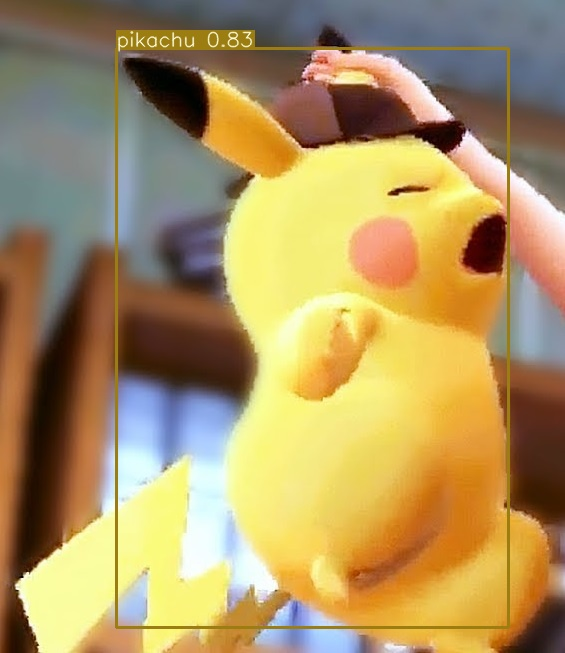

In [18]:
Image(filename='out_out/069.jpg', width=600)

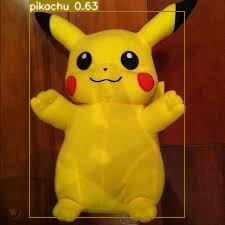

In [19]:
Image(filename='out_out/420.jpg', width=600)

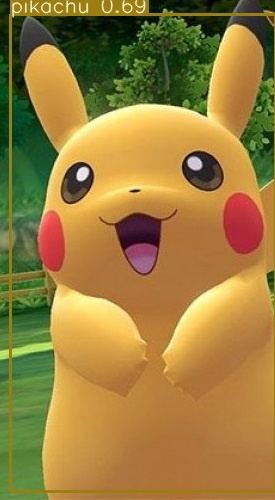

In [20]:
Image(filename='out_out/139.jpg', width=600)

In [21]:
!python3 detect.py --source ../../input/pikachusamples

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='output', save_txt=False, source='../../input/pikachusamples', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/5 ../../input/pikachusamples/maxresdefault.jpg: 320x512 1 pikachus, Done. (0.016s)
video 2/5 (1/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (2/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (3/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (4/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (5/2082) ../../input/pikachusamples/Pikachu Mom

video 2/5 (75/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (76/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (77/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (78/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (79/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (80/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (81/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (82/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.017s)
video 2/5 (83/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (84/2082) ../../input/pikachusamples/Pikachu Moments .

video 2/5 (156/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (157/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (158/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (159/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (160/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (161/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (162/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (163/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (164/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (165/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (166/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 

video 2/5 (245/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (246/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (247/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (248/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (249/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (250/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (251/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (252/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (253/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (254/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (255/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 

video 2/5 (334/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (335/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (336/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (337/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (338/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (339/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (340/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (341/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (342/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (343/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (344/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 

video 2/5 (424/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (425/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (426/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (427/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (428/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (429/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (430/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (431/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (432/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (433/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (434/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 

video 2/5 (512/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (513/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (514/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (515/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (516/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (517/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (518/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (519/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (520/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (521/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (522/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 

video 2/5 (593/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (594/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (595/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (596/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (597/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (598/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (599/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (600/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (601/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (602/2082) ../../input/pikachusamples/Pikachu

video 2/5 (674/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (675/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (676/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.020s)
video 2/5 (677/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (678/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (679/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (680/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (681/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (682/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (683/2082) ../../input/pikachusamples/Pikachu

video 2/5 (754/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.017s)
video 2/5 (755/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (756/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (757/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (758/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (759/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (760/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (761/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (762/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (763/2082) ../../input/pikachusamples/Pikachu

video 2/5 (835/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (836/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (837/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (838/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (839/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (840/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (841/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (842/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 2 pikachus, Done. (0.016s)
video 2/5 (843/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (844/2082) ../../input/pikachusamples/Pikachu

video 2/5 (914/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (915/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (916/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (917/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (918/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (919/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (920/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (921/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (922/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (923/2082) ../../input/pikachusamples/Pikachu

video 2/5 (993/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (994/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (995/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (996/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (997/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (998/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (999/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1000/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1001/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1002/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2

video 2/5 (1079/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1080/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1081/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1082/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1083/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1084/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1085/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1086/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1087/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1088/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1089/2082) ../../input/pikachusamples/Pikachu Mom

video 2/5 (1165/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1166/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1167/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1168/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1169/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1170/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1171/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1172/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1173/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1174/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.018s)
video 2/5 (1175/2082) ../../input/pikachusamples

video 2/5 (1252/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1253/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1254/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1255/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1256/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1257/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1258/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1259/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (1260/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1261/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1262/2082) ../../input/pikachusamples/Pikachu Mom

video 2/5 (1339/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1340/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1341/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1342/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.018s)
video 2/5 (1343/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1344/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1345/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1346/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1347/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1348/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1349/2082) ../../input/pi

video 2/5 (1419/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1420/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1421/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1422/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1423/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1424/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1425/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1426/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1427/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (1428/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1429/2082) ../../input/pi

video 2/5 (1504/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.025s)
video 2/5 (1505/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.026s)
video 2/5 (1506/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1507/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1508/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1509/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1510/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1511/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.023s)
video 2/5 (1512/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.017s)
video 2/5 (1513/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.020s)
video 2/5 (1514/2082) ../../input/pi

video 2/5 (1591/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1592/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1593/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1594/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1595/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1596/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1597/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1598/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1599/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1600/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)


video 2/5 (1675/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1676/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1677/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1678/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1679/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1680/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1681/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1682/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1683/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1684/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1685/2082) ../../input/pikachusamples/Pikachu Mom

video 2/5 (1762/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1763/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1764/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1765/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1766/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1767/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1768/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1769/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1770/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1771/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1772/2082) ../../input/pi

video 2/5 (1843/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1844/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1845/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (1846/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1847/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1848/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1849/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1850/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1851/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1852/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1853/2082) ..

video 2/5 (1927/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1928/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1929/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1930/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1931/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1932/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1933/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1934/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.017s)
video 2/5 (1935/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1936/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 Done. (0.016s)
video 2/5 (1937/2082) ../../input/pikachusamples/Pikachu Mom

video 2/5 (2009/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2010/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2011/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2012/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2013/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2014/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2015/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2016/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2017/2082) ../../input/pikachusamples/Pikachu Moments .mp4: 384x512 1 pikachus, Done. (0.016s)
video 2/5 (2018/2082) ../../input/pikachusampl

video 3/5 (4/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (5/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (6/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (7/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (8/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (9/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (10/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (11/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (12/3764) ../../input/pikachusamples/Pikachu can mim

video 3/5 (75/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.017s)
video 3/5 (76/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (77/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.017s)
video 3/5 (78/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (79/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (80/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (81/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (82/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (83/3764) ../../input/pikachusamples/Pikachu c

video 3/5 (143/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (144/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (145/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (146/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (147/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.016s)
video 3/5 (148/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (149/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (150/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4:

video 3/5 (209/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (210/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (211/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (212/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (213/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (214/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.017s)
video 3/5 (215/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (216/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (217/3764) ../../input/pikachusamples/

video 3/5 (279/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (280/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (281/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (282/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (283/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (284/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (285/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (286/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (287/3764) ../../input/pikachusamples/

video 3/5 (348/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (349/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (350/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (351/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (352/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (353/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (354/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (355/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (356/3764) ../../input/pikachusamples/

video 3/5 (419/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (420/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (421/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (422/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (423/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (424/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (425/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (426/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (427/3764) ../../input/pikachusamples/

video 3/5 (489/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (490/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (491/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (492/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (493/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (494/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (495/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (496/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.017s)
video 3/5 (497/3764) ../../input/pikachusamples/

video 3/5 (558/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (559/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (560/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (561/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (562/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (563/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (564/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (565/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (566/3764) ../../input/pik

video 3/5 (628/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (629/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (630/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (631/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (632/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (633/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (634/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (635/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (636/3764) ../../input/pik

video 3/5 (697/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (698/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (699/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (700/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.016s)
video 3/5 (701/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (702/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (703/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (704/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4:

video 3/5 (763/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (764/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (765/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.016s)
video 3/5 (766/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (767/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (768/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (769/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (770/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (7

video 3/5 (831/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (832/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (833/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (834/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (835/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (836/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (837/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (838/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (839/3764) ../../input/pikachusamples/

video 3/5 (900/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (901/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (902/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (903/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (904/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (905/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (906/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (907/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (908/3764) ../../input/pikachusamples/

video 3/5 (969/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (970/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (971/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (972/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (973/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (974/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (975/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (976/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (977/3764) ../../input/pikachusamples/

video 3/5 (1040/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1041/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1042/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (1043/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1044/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1045/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1046/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1047/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1048/3764) ../../input/pikach

video 3/5 (1110/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1111/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1112/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1113/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1114/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1115/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1116/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1117/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1118/3764) ../../input/pikach

video 3/5 (1180/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (1181/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1182/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1183/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1184/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1185/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1186/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1187/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1188/3764) ../../input/pikach

video 3/5 (1249/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1250/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1251/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1252/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1253/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1254/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1255/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1256/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1257/3764) ../../input/pikach

video 3/5 (1318/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.021s)
video 3/5 (1319/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.021s)
video 3/5 (1320/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.020s)
video 3/5 (1321/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.021s)
video 3/5 (1322/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1323/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.019s)
video 3/5 (1324/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.021s)
video 3/5 (1325/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.021s)
video 3/5 (1326/3764) ../../input/pikach

video 3/5 (1388/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1389/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1390/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1391/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1392/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1393/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1394/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1395/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1396/3764) ../../input/pikach

video 3/5 (1458/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1459/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1460/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1461/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1462/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1463/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1464/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1465/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1466/3764) ../../input/pikach

video 3/5 (1528/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1529/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (1530/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1531/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1532/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1533/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1534/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1535/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1536/3764) ../../input/pikach

video 3/5 (1597/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.023s)
video 3/5 (1598/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.021s)
video 3/5 (1599/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.020s)
video 3/5 (1600/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1601/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1602/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1603/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1604/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1605/3764) ../../input/pikach

video 3/5 (1667/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1668/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1669/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1670/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1671/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1672/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1673/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1674/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
vide

video 3/5 (1737/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1738/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1739/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1740/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1741/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1742/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1743/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1744/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (1745/3764) ../../input/pikach

video 3/5 (1802/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1803/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1804/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1805/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (1806/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1807/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1808/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (1809/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existe

video 3/5 (1865/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1866/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (1867/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (1868/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (1869/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (1870/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1871/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (1872/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (1932/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1933/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1934/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1935/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1936/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1937/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1938/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (1939/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2000/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2001/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2002/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2003/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2004/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2005/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2006/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2007/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2008/3764) ../../input/pikach

video 3/5 (2069/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (2070/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2071/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2072/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (2073/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.020s)
video 3/5 (2074/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.017s)
video 3/5 (2075/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.017s)
video 3/5 (2076/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (2077/3764) ../../input/pikach

video 3/5 (2139/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2140/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2141/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2142/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2143/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2144/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2145/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2146/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2147/3764) ../../input/pikach

video 3/5 (2210/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.021s)
video 3/5 (2211/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2212/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2213/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2214/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2215/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2216/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2217/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2218/3764) ../../input/pikach

video 3/5 (2279/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2280/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2281/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2282/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2283/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2284/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2285/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2286/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2287/3764) ../../input/pikach

video 3/5 (2347/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2348/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2349/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (2350/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2351/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2352/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2353/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2354/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2413/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2414/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2415/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2416/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2417/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2418/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2419/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2420/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2421/3764) ../../input/pikach

video 3/5 (2482/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (2483/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2484/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2485/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2486/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (2487/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2488/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2489/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2547/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.018s)
video 3/5 (2548/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (2549/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.018s)
video 3/5 (2550/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (2551/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.018s)
video 3/5 (2552/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (2553/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.016s)
video 3/5 (2554/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.019s)
video 3/5 (2555/3764) ../../input/pikach

video 3/5 (2610/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2611/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2612/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2613/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2614/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2615/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2616/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2617/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2673/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2674/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.014s)
video 3/5 (2675/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2676/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2677/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2678/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2679/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2680/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2737/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2738/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2739/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2740/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2741/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2742/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (2743/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2744/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (

video 3/5 (2803/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2804/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2805/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2806/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2807/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2808/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2809/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2810/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2866/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2867/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2868/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (2869/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2870/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2871/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (2872/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 2 pikachus, Done. (0.015s)
video 3/5 (2873/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2932/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2933/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.014s)
video 3/5 (2934/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2935/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2936/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2937/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2938/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2939/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (2996/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (2997/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2998/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (2999/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3000/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3001/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3002/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3003/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
vide

video 3/5 (3066/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3067/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (3068/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3069/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (3070/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3071/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.017s)
video 3/5 (3072/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3073/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3074/3764) ../../input/pikach

video 3/5 (3135/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3136/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3137/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3138/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3139/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3140/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3141/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (3142/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3143/3764) ../../input/pikach

video 3/5 (3206/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3207/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3208/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3209/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3210/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3211/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3212/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3213/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (3271/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3272/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3273/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3274/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3275/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3276/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3277/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3278/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (

video 3/5 (3338/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3339/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3340/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3341/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3342/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3343/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3344/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3345/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3346/3764) ../../input/pikach

video 3/5 (3403/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3404/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3405/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3406/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3407/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3408/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3409/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3410/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (3471/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3472/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3473/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3474/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3475/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.014s)
video 3/5 (3476/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3477/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3478/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3479/3764) ../../input/pikach

video 3/5 (3539/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3540/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3541/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3542/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 Done. (0.015s)
video 3/5 (3543/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3544/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3545/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3546/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikac

video 3/5 (3602/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.016s)
video 3/5 (3603/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.019s)
video 3/5 (3604/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.016s)
video 3/5 (3605/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3606/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3607/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3608/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3609/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (3666/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3667/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3668/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3669/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3670/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3671/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3672/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3673/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 3/5 (3729/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3730/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3731/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3732/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3733/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3734/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3735/3764) ../../input/pikachusamples/Pikachu can mimic any Pokemon in existence.mp4: 320x512 1 pikachus, Done. (0.015s)
video 3/5 (3736/3764) ../../input/pikachusamples/Pikachu can mimic any Pokem

video 4/5 (40/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (41/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (42/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (43/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (44/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (45/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (46/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (47/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (48/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (49/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (50/3713) ../../input/pikachusamples/videe

video 4/5 (128/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (129/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (130/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (131/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (132/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (133/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (134/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (135/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (136/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (137/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (138/3713) ../../input/pikachusamples/videedao.mp4: 320x

video 4/5 (214/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (215/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (216/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (217/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (218/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (219/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (220/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (221/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (222/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.016s)
video 4/5 (223/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (224/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.016s)
video

video 4/5 (302/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (303/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (304/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (305/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (306/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (307/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (308/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (309/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (310/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (311/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (312/3713) ../../input/pikachusamples/videed

video 4/5 (391/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (392/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (393/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (394/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (395/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (396/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (397/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (398/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (399/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (400/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (401/3713) ../../inp

video 4/5 (477/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (478/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (479/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (480/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (481/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (482/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (483/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (484/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (485/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (486/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (487/3713) ../../input/pikachusa

video 4/5 (564/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (565/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (566/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (567/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (568/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (569/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (570/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (571/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (572/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (573/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (574/3713) ../../inp

video 4/5 (654/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (655/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (656/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (657/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (658/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (659/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (660/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (661/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (662/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (663/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (664/3713) ../../input/pikachusamples/videed

video 4/5 (741/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (742/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (743/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (744/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (745/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (746/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (747/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (748/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (749/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (750/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (751/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (752/37

video 4/5 (830/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (831/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (832/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (833/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (834/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (835/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (836/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (837/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (838/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (839/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (840/3713) ../../inp

video 4/5 (916/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (917/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (918/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (919/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (920/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (921/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (922/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (923/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (924/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (925/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (926/3713) ../../input/pikachusamples/videed

video 4/5 (1003/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1004/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1005/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1006/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1007/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1008/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1009/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1010/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1011/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1012/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1013/3713

video 4/5 (1090/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1091/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1092/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1093/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (1094/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1095/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1096/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1097/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1098/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1099/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1100/3713

video 4/5 (1177/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1178/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1179/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1180/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1181/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (1182/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1183/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1184/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1185/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.018s)
video 4/5 (1186/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1187/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachu

video 4/5 (1262/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1263/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1264/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1265/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1266/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1267/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1268/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1269/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1270/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1271/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1272/3713) ../../input/pikachusamples/videedao.mp4: 320x5

video 4/5 (1349/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (1350/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1351/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1352/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1353/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1354/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1355/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1356/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1357/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1358/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1359/3713) ../../inpu

video 4/5 (1435/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1436/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1437/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1438/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1439/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (1440/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1441/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1442/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (1443/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1444/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (1445/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1446/37

video 4/5 (1522/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1523/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1524/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1525/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1526/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1527/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1528/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1529/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1530/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1531/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1532/3713

video 4/5 (1609/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1610/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1611/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1612/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1613/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1614/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1615/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1616/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1617/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1618/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1619/3713

video 4/5 (1695/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.018s)
video 4/5 (1696/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (1697/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.017s)
video 4/5 (1698/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (1699/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.017s)
video 4/5 (1700/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.017s)
video 4/5 (1701/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.018s)
video 4/5 (1702/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.018s)
video 4/5 (1703/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.018s)
video 4/5 (1704/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (1705/3713

video 4/5 (1781/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1782/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1783/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1784/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1785/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1786/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1787/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1788/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1789/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1790/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1791/3713

video 4/5 (1869/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1870/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1871/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1872/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1873/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1874/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1875/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1876/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1877/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1878/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1879/3713

video 4/5 (1955/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1956/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1957/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1958/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1959/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (1960/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1961/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1962/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1963/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (1964/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (1965/3713) ../../inpu

video 4/5 (2041/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2042/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2043/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2044/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2045/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2046/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2047/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2048/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2049/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2050/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2051/3713

video 4/5 (2128/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2129/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2130/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2131/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2132/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2133/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2134/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2135/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2136/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2137/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2138/3713) ../../input/pikachusam

video 4/5 (2215/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2216/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2217/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2218/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.019s)
video 4/5 (2219/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.025s)
video 4/5 (2220/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.018s)
video 4/5 (2221/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2222/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2223/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2224/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2225/3713

video 4/5 (2303/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2304/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2305/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2306/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2307/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2308/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2309/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2310/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2311/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2312/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2313/3713

video 4/5 (2390/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2391/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2392/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (2393/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2394/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2395/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (2396/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (2397/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (2398/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2399/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2400/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2401/37

video 4/5 (2476/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2477/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2478/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2479/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2480/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2481/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2482/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2483/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2484/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2485/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2486/3713) ../../input/pikachusam

video 4/5 (2564/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2565/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2566/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2567/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (2568/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (2569/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2570/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.017s)
video 4/5 (2571/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2572/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2573/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2574/3713) ../../input/pikachusamples/videeda

video 4/5 (2650/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.021s)
video 4/5 (2651/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.021s)
video 4/5 (2652/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.021s)
video 4/5 (2653/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.021s)
video 4/5 (2654/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.022s)
video 4/5 (2655/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.021s)
video 4/5 (2656/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.017s)
video 4/5 (2657/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.018s)
video 4/5 (2658/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.021s)
video 4/5 (2659/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.021s)
video 4/5 (2660/3713) ../../input/pikachusamples/videedao.mp4: 320x5

video 4/5 (2738/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.019s)
video 4/5 (2739/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.017s)
video 4/5 (2740/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2741/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2742/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2743/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2744/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2745/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2746/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.019s)
video 4/5 (2747/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.021s)
video 4/5 (2748/3713

video 4/5 (2827/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2828/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2829/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2830/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2831/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2832/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2833/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2834/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.019s)
video 4/5 (2835/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.019s)
video 4/5 (2836/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2837/3713

video 4/5 (2913/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2914/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2915/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2916/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2917/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2918/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2919/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (2920/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (2921/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.019s)
video 4/5 (2922/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.022s)
video 4/5 (2923/3713

video 4/5 (3000/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3001/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3002/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3003/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3004/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3005/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3006/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3007/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3008/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3009/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3010/3713

video 4/5 (3089/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3090/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3091/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3092/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3093/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3094/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3095/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3096/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3097/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3098/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3099/3713) ../../inpu

video 4/5 (3176/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3177/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3178/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3179/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3180/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3181/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3182/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3183/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3184/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.022s)
video 4/5 (3185/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.016s)
video 4/5 (3186/3713) ../../input/pikachusamples/videedao.mp4: 320x5

video 4/5 (3262/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.018s)
video 4/5 (3263/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3264/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.017s)
video 4/5 (3265/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3266/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.017s)
video 4/5 (3267/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3268/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3269/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3270/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3271/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.016s)
video 4/5 (3272/3713

video 4/5 (3349/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3350/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3351/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3352/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3353/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3354/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (3355/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3356/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3357/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3358/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3359/3713) ../../input/pikachusamples/videedao.mp4: 320x5

video 4/5 (3435/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3436/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3437/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3438/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3439/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3440/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3441/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3442/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3443/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3444/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3445/3713

video 4/5 (3523/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3524/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3525/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3526/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3527/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3528/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3529/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3530/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3531/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3532/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3533/3713

video 4/5 (3610/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3611/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3612/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3613/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3614/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (3615/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3616/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3617/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (3618/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.014s)
video 4/5 (3619/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3620/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachu

video 4/5 (3695/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3696/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3697/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3698/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3699/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3700/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3701/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3702/3713) ../../input/pikachusamples/videedao.mp4: 320x512 1 pikachus, Done. (0.015s)
video 4/5 (3703/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.015s)
video 4/5 (3704/3713) ../../input/pikachusamples/videedao.mp4: 320x512 Done. (0.014s)
video 4/5 (3705/3713) ../../input/pikachusam

video 5/5 (76/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (77/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (78/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (79/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (80/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (81/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (82/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (83/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (84/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (85/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (86/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (87/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (88/3595) ../../in

video 5/5 (172/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (173/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.014s)
video 5/5 (174/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (175/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (176/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (177/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (178/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (179/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (180/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.014s)
video 5/5 (181/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (182/3595) ../../input/pikachusamples/video.mp4: 3

video 5/5 (270/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (271/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (272/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (273/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (274/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (275/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (276/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (277/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (278/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (279/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (280/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (281/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (282/3

video 5/5 (368/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (369/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (370/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (371/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (372/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (373/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (374/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (375/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (376/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (377/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (378/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (379/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (380/3

video 5/5 (469/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (470/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (471/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (472/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (473/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (474/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (475/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (476/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (477/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (478/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (479/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (480/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (481/3

video 5/5 (569/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (570/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (571/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (572/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (573/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (574/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (575/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (576/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (577/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (578/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (579/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (580/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (581/3

video 5/5 (666/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (667/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (668/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (669/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (670/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (671/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (672/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (673/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (674/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (675/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (676/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (677/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (678/3

video 5/5 (768/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (769/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (770/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (771/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (772/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (773/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (774/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (775/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (776/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (777/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (778/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (779/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (780/3

video 5/5 (869/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (870/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (871/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (872/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (873/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (874/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (875/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (876/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (877/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (878/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (879/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (880/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (881/3

video 5/5 (970/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (971/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (972/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (973/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (974/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (975/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (976/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (977/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (978/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (979/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (980/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (981/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (982/3

video 5/5 (1067/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1068/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1069/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1070/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1071/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1072/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1073/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1074/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1075/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1076/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1077/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. 

video 5/5 (1164/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1165/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1166/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1167/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1168/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1169/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1170/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1171/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1172/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1173/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1174/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1175/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (1263/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1264/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1265/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1266/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1267/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1268/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1269/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1270/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1271/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1272/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1273/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1274/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (1360/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1361/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1362/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1363/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1364/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1365/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1366/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1367/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1368/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1369/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1370/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1371/3595) ../../input/pikachusamples/video.mp4: 320

video 5/5 (1454/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1455/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1456/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1457/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1458/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1459/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1460/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1461/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1462/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1463/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1464/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1465/3595) ../../input/pikac

video 5/5 (1545/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1546/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1547/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1548/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1549/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1550/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (1551/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1552/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1553/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1554/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1555/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1556/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (1644/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.018s)
video 5/5 (1645/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (1646/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.018s)
video 5/5 (1647/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1648/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.019s)
video 5/5 (1649/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1650/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (1651/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (1652/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (1653/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.019s)
video 5/5 (1654/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (1655/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
vide

video 5/5 (1743/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1744/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1745/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1746/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1747/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1748/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1749/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1750/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1751/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1752/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1753/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1754/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (1843/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1844/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1845/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1846/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (1847/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1848/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1849/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1850/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1851/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1852/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1853/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1854/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (

video 5/5 (1943/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1944/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.021s)
video 5/5 (1945/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1946/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1947/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1948/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1949/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1950/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1951/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (1952/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (1953/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (1954/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (2039/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2040/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2041/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2042/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2043/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2044/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2045/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2046/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2047/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2048/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2049/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2050/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (2139/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2140/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2141/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2142/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2143/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2144/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2145/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2146/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2147/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2148/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2149/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (2150/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (2232/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (2233/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (2234/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (2235/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2236/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2237/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.014s)
video 5/5 (2238/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (2239/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (2240/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (2241/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (2242/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. 

video 5/5 (2330/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2331/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2332/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2333/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2334/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2335/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2336/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2337/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2338/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2339/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2340/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2341/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (2428/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2429/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2430/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2431/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2432/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2433/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2434/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2435/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2436/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2437/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2438/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2439/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
vide

video 5/5 (2526/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2527/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2528/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2529/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2530/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2531/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2532/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2533/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2534/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2535/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2536/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2537/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (2626/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2627/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2628/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2629/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2630/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2631/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2632/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2633/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2634/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2635/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2636/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2637/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (2726/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (2727/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (2728/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (2729/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2730/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (2731/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2732/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2733/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2734/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2735/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2736/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2737/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
vide

video 5/5 (2826/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2827/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2828/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2829/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.016s)
video 5/5 (2830/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2831/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2832/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2833/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2834/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2835/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2836/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2837/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (2925/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2926/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2927/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2928/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2929/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2930/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2931/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2932/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2933/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2934/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (2935/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (2936/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
vide

video 5/5 (3023/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3024/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3025/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3026/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3027/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3028/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3029/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3030/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3031/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3032/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3033/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3034/3595) ../../input/pikac

video 5/5 (3119/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3120/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3121/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3122/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (3123/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.024s)
video 5/5 (3124/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.025s)
video 5/5 (3125/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (3126/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (3127/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.020s)
video 5/5 (3128/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (3129/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
video 5/5 (3130/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.017s)
vide

video 5/5 (3214/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3215/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3216/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3217/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3218/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3219/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3220/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.016s)
video 5/5 (3221/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3222/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3223/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3224/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3225/3595) ../../input/pikac

video 5/5 (3312/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3313/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3314/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3315/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3316/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3317/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3318/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3319/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3320/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3321/3595) ../../input/pikachusamples/video.mp4: 320x512 1 pikachus, Done. (0.015s)
video 5/5 (3322/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3323/3595) ../../input/pikachusamples/video.mp4: 320

video 5/5 (3410/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3411/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3412/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3413/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3414/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3415/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3416/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3417/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3418/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3419/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3420/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3421/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
vide

video 5/5 (3510/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3511/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3512/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3513/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3514/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3515/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3516/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3517/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3518/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
video 5/5 (3519/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3520/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.015s)
video 5/5 (3521/3595) ../../input/pikachusamples/video.mp4: 320x512 Done. (0.014s)
vide

In [22]:
ls output/

'Pikachu Moments .mp4'                             videedao.mp4
'Pikachu can mimic any Pokemon in existence.mp4'   video.mp4
 maxresdefault.jpg


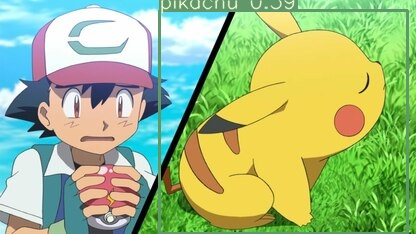

In [23]:
Image(filename='output/maxresdefault.jpg', width=600)

In [29]:
import io

import base64

from IPython.display import HTML

video = io.open('output/video.mp4', 'r+b').read()

encoded = base64.b64encode(video)

HTML(data='''<video alt="test" controls>

<source src="data:video/mp4;base64,{0}" type="video/mp4" /> </video>'''.format(encoded.decode('ascii')))